# Introduction to neural network classification with TensorFlow

In this notebook we're going to learn how to write neural networks for classification problems. A classification is where you try to classify something as one thing or another, whereas a regression is where you try to predict a number.

A few example classification problems include:
* Binary classification - is this a cat or a dog?
* Multiclass classification - is this a dog, cat or hamster?
* Multilabel classification - is this a dog, cat or both?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles

In [2]:
# Make 1000 circles examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [3]:
# Check out the features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [4]:
# Check the labels
y[:20]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0])

In [5]:
# Creating a dataframe out of our circles
df = pd.DataFrame({'X0':X[:,0], "X1":X[:,1], "label":y})
df.head(10)

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


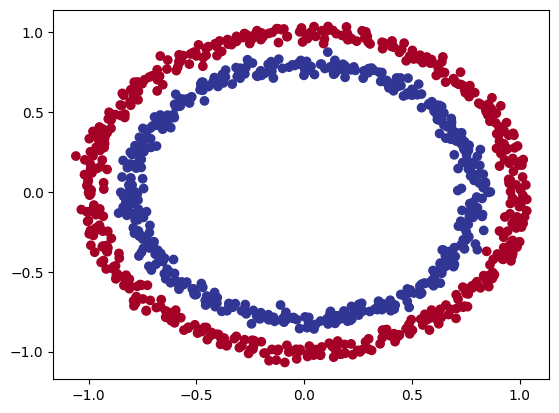

In [6]:
# visualise with a plot
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu);

## Input and output shapes

In [7]:
# Checking the shapes of the features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [8]:
X[18], y[18]

(array([-0.81891362, -0.10162399]), 1)

In [9]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.legacy.SGD(),
              metrics=['accuracy'])

# Fit the model
model.fit(X, y, epochs=5)

Metal device set to: Apple M2

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB

Epoch 1/5


2023-07-22 14:52:56.979628: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


32/32 [==============================] - 1s 9ms/step - loss: 5.8724 - accuracy: 0.4870
Epoch 2/5
32/32 [==============================] - 0s 5ms/step - loss: 5.5286 - accuracy: 0.4890
Epoch 3/5
32/32 [==============================] - 0s 7ms/step - loss: 3.8420 - accuracy: 0.5090
Epoch 4/5
32/32 [==============================] - 0s 6ms/step - loss: 1.5640 - accuracy: 0.4890
Epoch 5/5
32/32 [==============================] - 0s 6ms/step - loss: 0.7295 - accuracy: 0.4930


In [10]:
# train for longer to improve our model
model.fit(X, y, epochs=200, verbose=0)

In [11]:
model.evaluate(X, y)

32/32 [==============================] - 1s 6ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

**Not performing well enough as the accuracy is 50%**

In [12]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.legacy.SGD(),
              metrics=['accuracy'])

# Fit the model
model_2.fit(X, y, epochs=100, verbose=0)

In [13]:
model_2.evaluate(X, y)

32/32 [==============================] - 0s 6ms/step - loss: 0.6932 - accuracy: 0.5000


[0.6932278871536255, 0.5]

**Not working.......**

## Imporving the model

Tricks to improve a classification model:
* **Adding more layers** - If you want your model to learn more complex patterns, you can add more layers (e.g. GlobalAveragePooling2D or more Conv2D layers).
* **Increasing the number of hidden units** - The number of hidden units is a parameter you can tweak (similar to learning rate) which controls how many patterns your model learns.
* **Change the activation functions** - There are many different activation functions you can choose from, each has their own pros and cons.
* **Change the optimization function** - Whilst the Adam optimizer is a good default choice, you might want to try something like stochastic gradient descent (SGD) or RMSprop optimizer.
* **Fitting on more data** - This might sound obvious but the more data your model is fit on, the better chance it has to learn the patterns within the data.
* **Fitting for longer** - Along with more data, a model has a better chance of learning the patterns in the data when it has seen it multiple times. This is controlled by the epochs parameter.

In [14]:
# Adding an extra layer and changing the optimizer 

# Set random seed
tf.random.set_seed(42)

# Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.legacy.Adam(),
              metrics=['accuracy'])

# Fit the model
model_3.fit(X, y, epochs=100, verbose=0)

In [15]:
model_3.evaluate(X, y)

32/32 [==============================] - 1s 14ms/step - loss: 0.7052 - accuracy: 0.5070


[0.7052209377288818, 0.5070000290870667]

In [16]:
def plot_decision_boundary(model, X, y):
    """
    Plots the decision boundary created by a model predicting on X.
    """
    # Define the axis boundaries of the plot and create a meshgrid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    # Create X value (we're going to make predictions on these)
    x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together
    # Make predictions
    y_pred = model.predict(x_in)
    
    # Check for multi-class
    if y_pred.shape[1] > 1:
        print("doing multiclass classification")
        # We have to reshape our prediction to get them ready for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("doing binary classification")
        y_pred = np.round(y_pred).reshape(xx.shape)
        
    # Plot the decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 2ms/step
doing binary classification


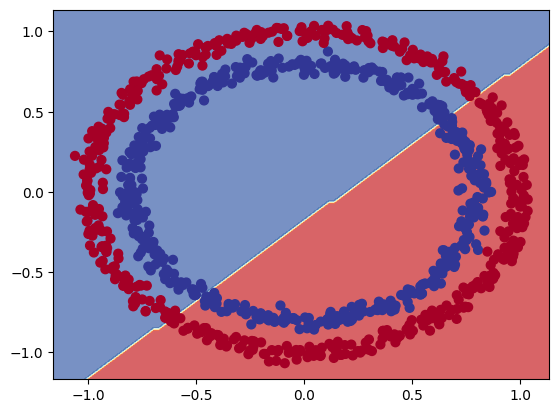

In [17]:
# Check out the predictions our model is making
plot_decision_boundary(model=model_3,
                       X=X,
                       y=y)

In [27]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation="linear")
])

model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=['accuracy'])

history = model_4.fit(X, y, epochs=100, verbose=0) 

In [29]:
model_4.evaluate(X, y)

32/32 [==============================] - 0s 7ms/step - loss: 4.1339 - accuracy: 0.4790


[4.133925437927246, 0.4790000021457672]

313/313 [==============================] - 1s 2ms/step
doing binary classification


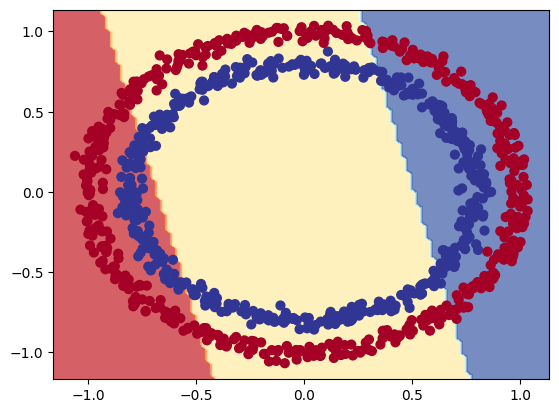

In [31]:
# Check the decision boundary for our latest model
plot_decision_boundary(model=model_4, X=X, y=y)

## Non-linearity

The combination of **linear(straight lines) and non-linear(curves) functions** is one of the key ingredients which makes neural networks so powerful.

In [32]:
# Build the neural network with a non-linear activation
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation="relu")
])

model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=['accuracy'])

history_1 = model_5.fit(X, y, epochs=100, verbose=0) 

In [33]:
model_5.evaluate(X, y)

32/32 [==============================] - 0s 6ms/step - loss: 4.6210 - accuracy: 0.4760


[4.620975971221924, 0.47600001096725464]

In [36]:
# https://playground.tensorflow.org/
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=['accuracy'])

history_2 = model_6.fit(X, y, epochs=250, verbose=0)

In [37]:
model_6.evaluate(X, y)

32/32 [==============================] - 0s 8ms/step - loss: 0.1208 - accuracy: 0.9920


[0.12082801014184952, 0.9919999837875366]

313/313 [==============================] - 1s 2ms/step
doing binary classification


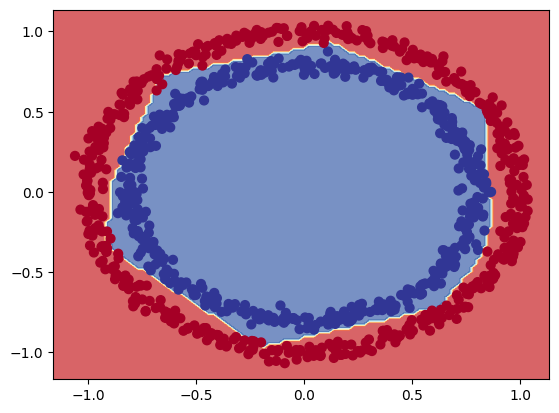

In [38]:
plot_decision_boundary(model=model_6, X=X, y=y)